<a href="https://colab.research.google.com/github/tccnchsu/PDE/blob/main/1DPoissonforgaussionsource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1DPoissonforgaussionsource

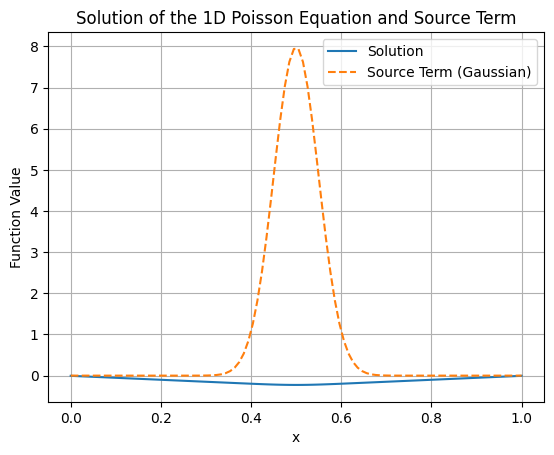

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_1d(x, x0, sigma, amplitude):
    """
    Compute the value of a 1D Gaussian function at given coordinates.

    Parameters:
        x (float or numpy.ndarray): X-coordinate(s) where the Gaussian is evaluated.
        x0 (float): X-coordinate of the center of the Gaussian.
        sigma (float): Standard deviation of the Gaussian.
        amplitude (float): Amplitude of the Gaussian.

    Returns:
        float or numpy.ndarray: Value(s) of the 1D Gaussian function at the given coordinates.
    """
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

def solve_1Dpoisson_equation(N, x0, sigma, amplitude):
    """
    Solve the 1D Poisson equation with a Gaussian source term using finite difference method.

    Parameters:
        N (int): Number of grid points.
        x0 (float): X-coordinate of the center of the Gaussian source term.
        sigma (float): Standard deviation of the Gaussian source term.
        amplitude (float): Amplitude of the Gaussian source term.

    Returns:
        numpy.ndarray: Solution to the 1D Poisson equation.
    """
    h = 1 / (N + 1)
    x = np.linspace(0, 1, N)
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Assemble the coefficient matrix A and the right-hand side vector b
    for i in range(N):
        A[i, i] = -2
        b[i] = gaussian_1d(x[i], x0, sigma, amplitude) * h**2
        if i > 0:
            A[i, i-1] = 1
        if i < N - 1:
            A[i, i+1] = 1

    # Solve the linear system using numpy's linear algebra solver
    solution = np.linalg.solve(A, b)
    return solution

# Example usage:
N = 100
x0 = 0.5
sigma = 0.05
amplitude = 1.0  # Amplitude of the Gaussian

# Solve the 1D Poisson equation
solution = solve_1Dpoisson_equation(N, x0, sigma, amplitude)

# Plot the solution
x = np.linspace(0, 1, N)
plt.plot(x, solution, label='Solution')

# Plot the Gaussian function used as the source term
source_term = gaussian_1d(x, x0, sigma, amplitude)
plt.plot(x, source_term, label='Source Term (Gaussian)', linestyle='--')

plt.title('Solution of the 1D Poisson Equation and Source Term')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('1D_Poisson_Solution_Source.png')

# Show the plot
plt.show()
